In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')
df.head()

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26800\2857794504.py:8: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')


,Churn,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,0,1,0,0,0,0,2
1,0,34,0,2,0,1,3
2,1,2,0,2,0,0,3
3,0,45,0,2,2,1,0
4,1,2,1,0,0,0,2


In [40]:
# Chia dữ liệu thành features (X) và target (y)
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [41]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Khởi tạo mô hình Logistic Regression
logreg_model = LogisticRegression(max_iter=100,tol=1e-4)

# Huấn luyện mô hình trên tập huấn luyện
logreg_model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = logreg_model.predict(X_test)

In [46]:
# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100 :.2f}'' %')

# In ra confusion matrix và báo cáo classification
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 77.90 %

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.61      0.51      0.56       574

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113


Confusion Matrix:
[[1354  185]
 [ 282  292]]


In [44]:
# Lấy ra các hệ số (weights) và intercept từ mô hình
weights = logreg_model.coef_
intercept =logreg_model.intercept_

# In ra hàm dự đoán
print("Hàm dự đoán:")
print(f"y_pred = sigmoid({intercept} + {weights} * X)")


Hàm dự đoán:
y_pred = sigmoid([0.37031758] + [[-0.01438485 -0.02844266 -0.46813607 -0.31957117 -1.08303881 -0.01932248]] * X)


In [30]:
X1 = {
    'tenure': 5,
    'InternetService': 1,
    'OnlineSecurity': 0,
    'TechSupport': 0,
    'Contract': 0,
    'PaymentMethod':3
}

X1_df = pd.DataFrame(X1, index=[0])

Y1 = logreg_model.predict(X1_df)
if Y1 == 0:
    print("Dự báo khách hàng X1 bằng mô hình Hồi Quy Logitic: No")
else: 
    print("Dự báo khách hàng X1 bằng mô hình Hồi Quy Logitic: Yes")

Dự báo khách hàng X1 bằng mô hình Hồi Quy Logitic: Yes


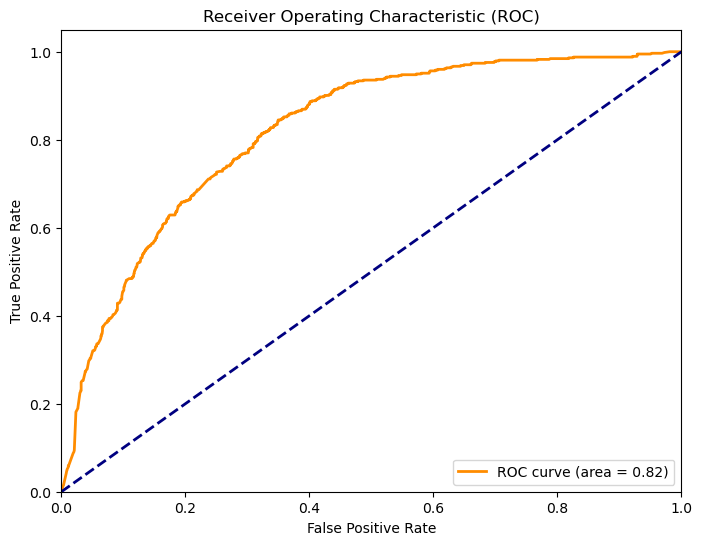

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
X_test = X_test.astype(int)
# Dự đoán xác suất và tính toán ROC
y_scores = logreg_model.predict_proba(X_test)[:, 1]  # Lấy xác suất của lớp positive
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression(tol=1e-4)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# In ra các thông số của mô hình sau khi huấn luyện
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Number of iterations:", model.n_iter_)

Intercept: [0.37031758]
Coefficients: [[-0.01438485 -0.02844266 -0.46813607 -0.31957117 -1.08303881 -0.01932248]]
Number of iterations: [40]
